In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\zamok\Downloads\archive (1)\stocks.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [43]:
# Clean the data
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()

# Display data types
print("\nData types:\n", df.dtypes)

# Fill missing values in 'Daily Return' using forward fill
df['Daily Return'] = df['Daily Return'].ffill()

# Handle the first row's NaN in 'Daily Return' by setting it to 0 (or another appropriate value)
df.loc[0, 'Daily Return'] = 0

# Check for missing values after filling
print("\nMissing values after filling:\n", df.isnull().sum())

# Summary statistics for numerical columns (excluding 'Date')
summary_stats = df.drop(columns=['Date']).describe()
print("\nSummary statistics:\n", summary_stats)


Missing values:
 Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
dtype: int64

Number of duplicates: 0

Data types:
 Ticker                  object
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Daily Return           float64
dtype: object

Missing values after filling:
 Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
dtype: int64

Summary statistics:
              Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.14788

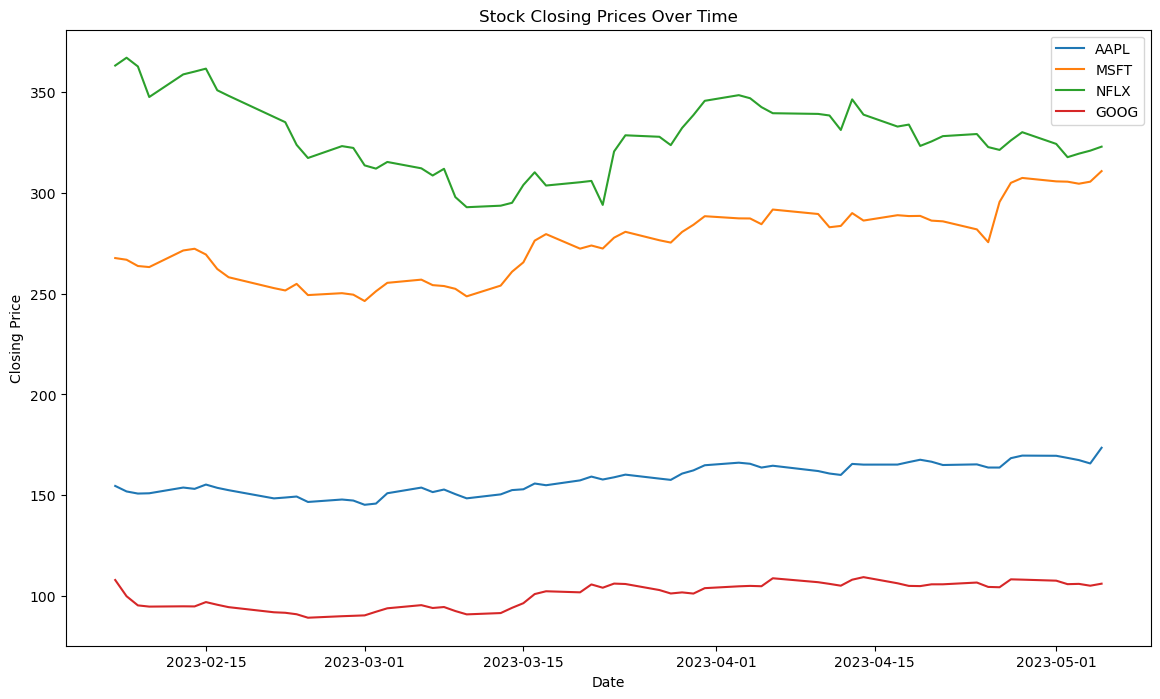

In [17]:
# Plot closing prices over time
plt.figure(figsize=(14, 8))
for ticker in df['Ticker'].unique():
    stock_data = df[df['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


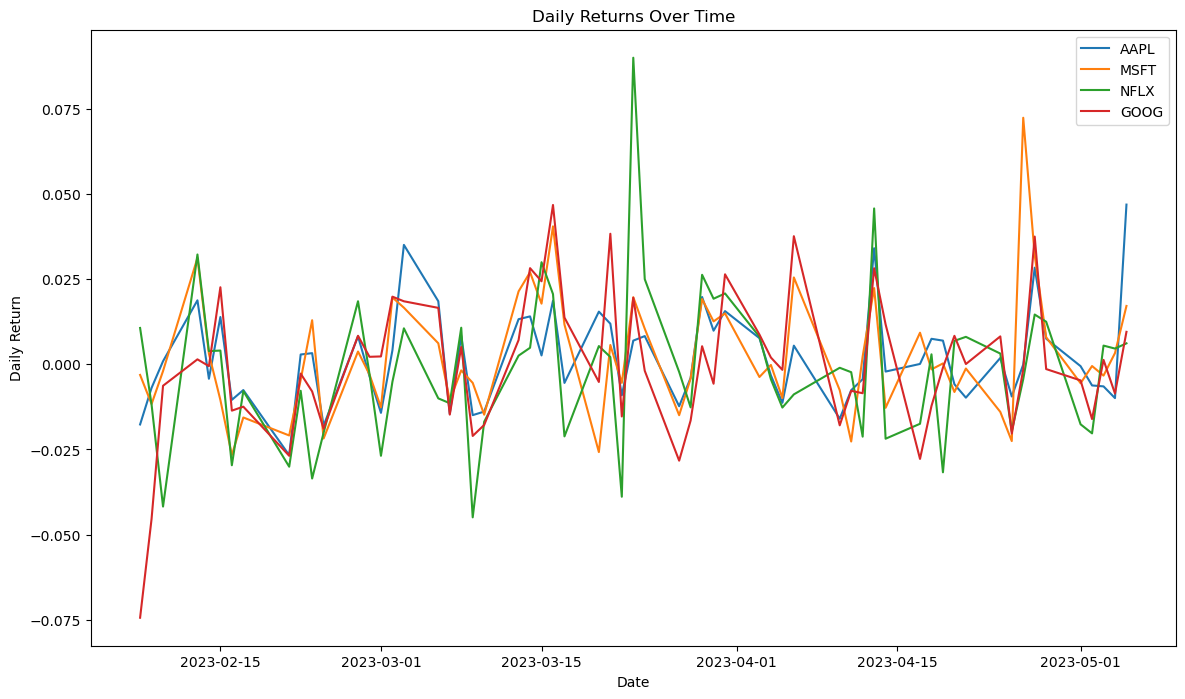

In [19]:
# Calculate daily returns
df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 8))
for ticker in df['Ticker'].unique():
    stock_data = df[df['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Daily Return'], label=ticker)

plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

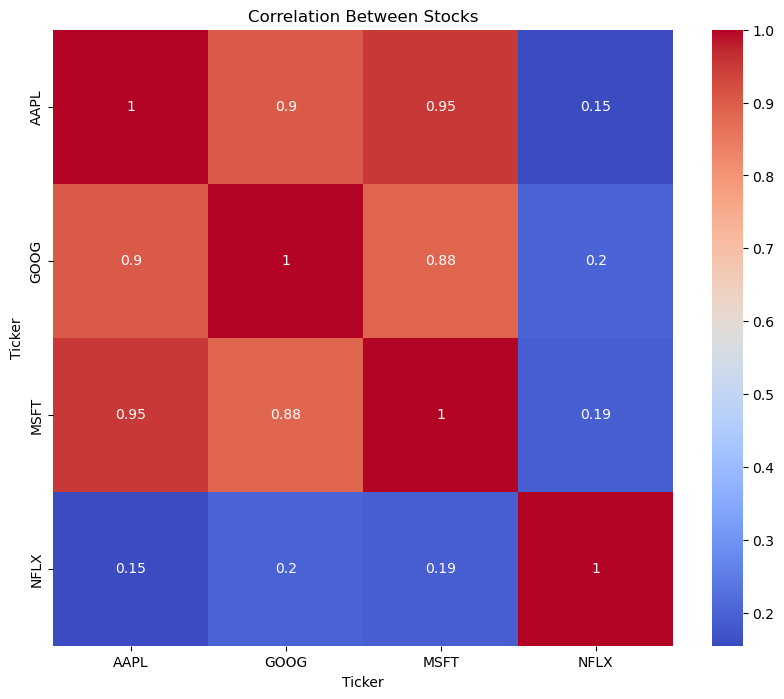

In [21]:
# Pivot the data to have stocks as columns
pivot_df = df.pivot(index='Date', columns='Ticker', values='Close')

# Calculate correlation matrix
correlation_matrix = pivot_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stocks')
plt.show()

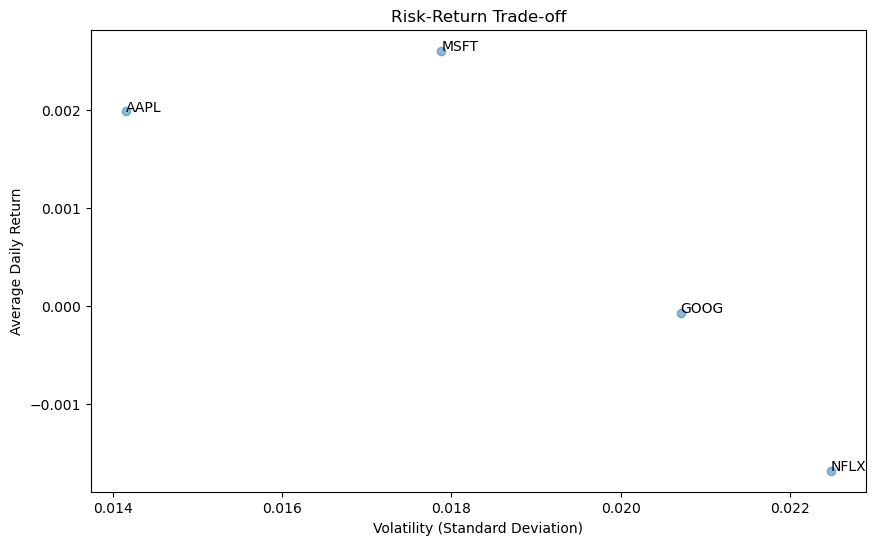

In [25]:
# Plot risk-return trade-off
plt.figure(figsize=(10, 6))
plt.scatter(risk_return['std'], risk_return['mean'], alpha=0.5)
for i, txt in enumerate(risk_return.index):
    plt.annotate(txt, (risk_return.iloc[i]['std'], risk_return.iloc[i]['mean']))

plt.title('Risk-Return Trade-off')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Average Daily Return')
plt.show()


In [47]:
# Export the cleaned data to a CSV file
df.to_csv('cleaned_stocks.csv', index=False)


# Stock Market Analysis Report

## Introduction
This project analyzes stock market data for four companies: AAPL, MSFT, NFLX, and GOOG. The dataset includes daily stock prices (Open, High, Low, Close, Adjusted Close) and trading volumes from February to May 2023. The goal is to identify trends, assess volatility, study correlations, and evaluate the risk-return trade-off for these stocks.

## Data Cleaning
- The dataset was loaded and checked for missing values and duplicates.
- The Date column was converted to a datetime format for time-series analysis.
- No missing values or duplicates were found.

## Exploratory Data Analysis (EDA)

### 1. Trend Analysis
- The closing prices of all four stocks were plotted over time.
- **AAPL** and **MSFT** showed a steady upward trend, while **NFLX** and **GOOG** exhibited more volatility.

### 2. Volatility Assessment
- Daily returns were calculated and plotted for each stock.
- **NFLX** had the highest volatility, while **MSFT** was the most stable.

### 3. Correlation Study
- A correlation heatmap was created to analyze the relationship between the stocks.
- **AAPL** and **MSFT** showed a strong positive correlation, while **NFLX** had a weaker correlation with the other stocks.

### 4. Risk-Return Trade-off
- The average daily return and volatility were calculated for each stock.
- **AAPL** offered the best risk-return trade-off, with moderate volatility and high returns.

## Key Insights
- **Trends**: **AAPL** and **MSFT** are more stable and show consistent growth, making them suitable for long-term investments.
- **Volatility**: **NFLX** is highly volatile, offering high-risk, high-reward opportunities.
- **Correlations**: **AAPL** and **MSFT** move together, suggesting limited diversification benefits when combined.
- **Risk-Return**: **AAPL** provides the best balance between risk and return.

## Recommendations
- **Long-term Investors**: Consider **AAPL** and **MSFT** for stable growth.
- **Risk-tolerant Investors**: **NFLX** offers high returns but comes with higher risk.
- **Diversification**: Combine **AAPL** and **GOOG** for better diversification.

## Limitations
- The analysis is based on historical data and may not predict future performance.
- External factors like market news and global events are not considered.

## Future Work
- Use machine learning models to predict future stock prices.
- Optimize a portfolio using Markowitz Portfolio Theory.
- Include more stocks and sectors for a broader analysis.

## Conclusion
This analysis provides valuable insights into the performance of **AAPL**, **MSFT**, **NFLX**, and **GOOG**. By understanding trends, volatility, correlations, and risk-return trade-offs, investors can make informed decisions to optimize their portfolios.
